## Projeto Final de Processamento de Imagens

**Nome:** Erika Hamakami
**RA:** 1997386

**Enunciado Trabalho:** Para realização do trabalho deve-se aplicar uma arquitetura CNN a um conjunto de imagens gerado pelo próprio aluno ou um conjunto de imagens público qualquer. Para tanto vocês podem utilizar a biblioteca Keras como apoio. Como resultado deve-se mostrar a acurácia atingida pela rede utilizando os respectivos conjuntos de imagens.

**Motivação:** dificuldade na identificação do tipo de flor, respondendo a pergunta "Que flor é essa?".

**Referências utilizadas:**

https://www.kaggle.com/code/epiktroll/flowers-recognition-with-custom-cnn

https://www.kaggle.com/code/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

https://ietresearch.onlinelibrary.wiley.com/doi/full/10.1049/iet-cvi.2017.0155

https://medium.com/analytics-vidhya/how-to-create-effective-cnn-for-your-use-case-6bae5c6871f6

https://estevestoni.medium.com/agrupando-conceitos-e-classificando-imagens-com-deep-learning-5b2674f99539

https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7

**Dataset:** https://www.kaggle.com/datasets/alxmamaev/flowers-recognition

## Etapas do projeto

1 - Importação dos módulos a serem utilizados e leitura dos dados

2 - Leitura

3 - Preparação do conjunto de dados

4 - Construção do modelo de arquitetura

5 - Treinamento do modelo

6 - Classificação das imagens/Resultados

## Dataset

Dataset possui 4242 imagens de flores separadas em 5 grupos/tipos diferentes: daisy, dandelion, rose, sunflower, tulip. Para cada grupo existem aproximadamente 800 imagens de 320 x 240 pixels.

## 1 - Importação dos módulos utilizados

~ numpy: para trabalhar com arrays, algebra linear, transformadas de fourier e matrizes

~ pandas: para trabalhar com análise e processamento de dados

~ matplotlib.pyplot:  para plotar graficos 2D

~ plotly.plotly: para visualização de graficos tambem

~ plotly.graph_objs: para visualização de graficos tambem

~ seaborn: facilita a criacao de gráficos no # matplotlib

~ cv2: open cv

~ keras: biblioteca de rede neural

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import cv2

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf

from tensorflow.keras import Sequential, datasets, layers, models, optimizers, preprocessing

import os

#diretorio onde os dados estão armazenados
print(os.listdir("C:/Users/Erika/Documents/Processamento de Imagens/ProjetoFinal/flower"))

['flowers']


## 2 - Leitura dos Dados

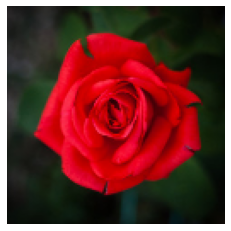

In [2]:
# Plotando uma imagem qualquer para teste

img = plt.imread("C:/Users/Erika/Documents/Processamento de Imagens/ProjetoFinal/flower/flowers/rose/8032328803_30afac8b07_m.jpg")
img = cv2.resize(img,(128,128))
plt.imshow(img)
plt.axis("off")
plt.show()

In [3]:
#C riar lista x e y das imagens
# Redimensionar todas as imagens para o tamanho 128x128 pixels
# append() é utilizado para concatenar as imagens no final da lista

x = list() # lista das imagens
y = list() # lista das categorias
IMG_SIZE = 128

for i in os.listdir("C:/Users/Erika/Documents/Processamento de Imagens/ProjetoFinal/flower/flowers/daisy"):
    try:
        path = "C:/Users/Erika/Documents/Processamento de Imagens/ProjetoFinal/flower/flowers/daisy/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x.append(img)
        y.append(0)
    except:
        None
        
for i in os.listdir("C:/Users/Erika/Documents/Processamento de Imagens/ProjetoFinal/flower/flowers/dandelion"):
    try:
        path = "C:/Users/Erika/Documents/Processamento de Imagens/ProjetoFinal/flower/flowers/dandelion/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x.append(img)
        y.append(1)
    except:
        None
        
for i in os.listdir("C:/Users/Erika/Documents/Processamento de Imagens/ProjetoFinal/flower/flowers/rose"):
    try:
        path = "C:/Users/Erika/Documents/Processamento de Imagens/ProjetoFinal/flower/flowers/rose/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x.append(img)
        y.append(2)
    except:
        None
        
for i in os.listdir("C:/Users/Erika/Documents/Processamento de Imagens/ProjetoFinal/flower/flowers/sunflower"):
    try:
        path = "C:/Users/Erika/Documents/Processamento de Imagens/ProjetoFinal/flower/flowers/sunflower/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x.append(img)
        y.append(3)
    except:
        None
        
for i in os.listdir("C:/Users/Erika/Documents/Processamento de Imagens/ProjetoFinal/flower/flowers/tulip"):
    try:
        path = "C:/Users/Erika/Documents/Processamento de Imagens/ProjetoFinal/flower/flowers/tulip/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x.append(img)
        y.append(4)
    except:
        None
        
x = np.array(x)

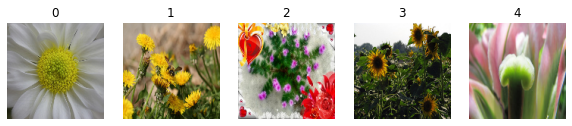

In [4]:
# plotando algumas flores, multiplica-se por 950 para conseguir pegar uma imagem de cada categoria

plt.figure(figsize = (10,10)) #plotar figura com tamanho 10x10

for i in range(5):
    img = x[950*i]
    plt.subplot(1,5,i+1) #plotar 1 linha com 5 imagens
    plt.imshow(img)
    plt.axis("off")
    plt.title(y[950*i])

    

## 3 - Preparação dos dados

In [5]:
# substituir a lista y convertendo para uma matriz
# keras.to_categorical vai pegar o vertor que representa as categorias de flores (y) e converter para uma matriz com valores binários

from keras.utils.np_utils import to_categorical

y = to_categorical(y,num_classes = 5)

In [20]:
# primeiro vamos separar os dados para teste

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)


In [21]:
# separar dados para validação e para o treinamento

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.15, random_state = 42)

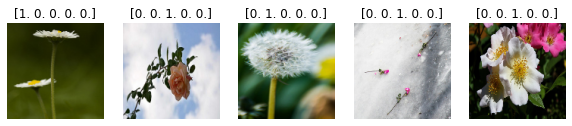

In [22]:
#fazendo um teste, plotando imagens do treinamento de dados - está multiplicando por 600 para pegar alguma imagem aletória

plt.figure(figsize = (10,10))
for i in range(5):
    img = x_train[600*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y_train[600*i])
plt.show()

In [23]:
#forma do treinamento

x_train.shape

# print(type(x_train))

(3118, 128, 128, 3)

## Construindo arquitetura CNN

#### Criando modelo sequencial




#### Criando a base convolucional

~ BatchNormalization é uma técnica para padronizar as entradas de uma rede, aplicada diretamente às ativações de uma camada anterior ou de entradas. Ajuda a acelerar o treinamento e regularizar, diminuindo o erro

~ Dropout é uma técina utilizada para deixar de usar alguns neuronios da rede, assim os neuronios vizinhos terão que atribuir a esse neuronio "dropped out" alguma representação para prever esse neuronio que "sumiu". Esse técnica auxilia a diminuir o overfitting dos dados de treinamento

~ Input Layer representa a imagem de entrada. Vai redimensionar a imagem em um array de uma dimensão

~ Conv Layer essa camada vai extrair as features da imagem

~ Pooling Layer essa camada reduz o volume espacial da imagem de entrada depois da convolução

~ Bottleneck - modelo de arquitetura utilizada quando se precisa levar em consideração os detalhes tamanhos, por exemplo formato e tamanho das petalas das flores

~ Maxpooling para focar nos pixels mais claros para conseguir detectar melhor o objeto

~ Ativação ReLu vai zerar as entradas negativas, não ativando esses neurônios

~ Softmax é um tipo de função sigmoide que consegue lidar com mais de dois tipos de classificação

In [24]:
model = Sequential()

# 1ª Camada de convolução
model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), padding = "Same", activation = "relu" , input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(layers.MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 2ª Camada de convolução
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu" , input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(layers.MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 3ª Camada de convolução
model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), padding = "Same", activation = "relu" , input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(layers.MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)      

#### Criando as Dense layers

Para performar a a classificação

~ Fully Connected Layer vai conectar a rede de uma camada para outra

~ Output Layer é o valor previsto das camadas

In [25]:
#Flatten vai desenrolar a saída de 3 dimensões em 1 dimensão
model.add(Flatten())

# 1ª Camada totalmente conectada
# Hidden layer
model.add(Dense(512, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# Output layer
# softmax activation é usado para representar a probabilidade de distribuição quando existem varias possibilidades de classificação
model.add(Dense(5, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)      

#### Compilando o modelo

In [26]:
#calcula o valor do erro e da acurácia, utlizando um otimizador adam com taxa de aprendizado de 0.001
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics = ['accuracy'])

#### Configurando a quantidade de épocas e o valor do batch

In [27]:
epoch = 20 
batch_size = 64

#### Criando o data augmentation aplicado ao x_train

Data augmentation é conjunto de técnicas para aumentar artificialmente a quantidadade de dados a partir de novo data points dos dados existentes. Isso inclui fazer pequenas mudanças nos dados ou usando deep learning para gerar novos datas points.
Isso aumenta a performance e acuracia do modelo, deixando ele mais robusto

In [28]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # define a média de entrada como 0 no conjunto de dados
    samplewise_center=False,  # define a média de cada amostra como 0
    featurewise_std_normalization=False,  # divide as entradas by std do dataset
    samplewise_std_normalization=False,  # divide cada entrada pelo seu std
    rotation_range=60,  #  randomicamente rotacional a imagem no range de (60, 0 to 180) graus
    zoom_range = 0.1, # randomicamente dá zoom na imagem 
    width_shift_range=0.1,  # randomicamente muda a imagem horizontalmente em uma fração da largura
    height_shift_range=0.1, # randomicamente muda a imagem verticalmente em uma fração da altura
    shear_range=0.1,  # randomicamente cisalha a imagem na direção do relógio
    fill_mode = "reflect" # reflete a entrada de dados
    ) 
datagen.fit(x_train)

#### Parada antecipada para descobrir o numero ideal de epocas

In [29]:
# # from keras import callbacks
# earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
#                                         mode ="min", patience = 5, 
#                                         restore_best_weights = True)

#### Treinando o modelo

In [30]:
history = model.fit(datagen.flow(x_train, y_train, batch_size = batch_size),
                    epochs = epoch, 
                    validation_data = (x_val, y_val),
                    steps_per_epoch = x_train.shape[0] // batch_size,
#                     callbacks =[earlystopping]
                    )

Epoch 1/20
48/48 [==============================] - 81s 2s/step - loss: 1.8898 - accuracy: 0.4604 - val_loss: 6.6416 - val_accuracy: 0.3412
Epoch 2/20
48/48 [==============================] - 107s 2s/step - loss: 1.3507 - accuracy: 0.5259 - val_loss: 2.0259 - val_accuracy: 0.4864
Epoch 3/20
48/48 [==============================] - 145s 3s/step - loss: 1.2105 - accuracy: 0.5563 - val_loss: 1.6857 - val_accuracy: 0.5572
Epoch 4/20
48/48 [==============================] - 148s 3s/step - loss: 1.1337 - accuracy: 0.5786 - val_loss: 1.1976 - val_accuracy: 0.6134
Epoch 5/20
48/48 [==============================] - 145s 3s/step - loss: 1.0395 - accuracy: 0.6195 - val_loss: 0.9664 - val_accuracy: 0.6352
Epoch 6/20
48/48 [==============================] - 137s 3s/step - loss: 1.0002 - accuracy: 0.6362 - val_loss: 1.2240 - val_accuracy: 0.6098
Epoch 7/20
48/48 [==============================] - 107s 2s/step - loss: 0.9167 - accuracy: 0.6473 - val_loss: 1.0260 - val_accuracy: 0.6606
Epoch 8/20
48/

In [31]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)
print("Acurácia dos Testes: ", test_acc*100) # pega o valor de acordo com teste dos dados

21/21 - 6s - loss: 0.6901 - accuracy: 0.7562 - 6s/epoch - 287ms/step
Acurácia dos Testes:  75.61728358268738


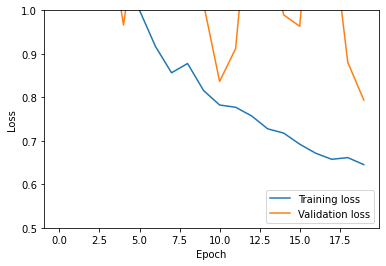

In [38]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

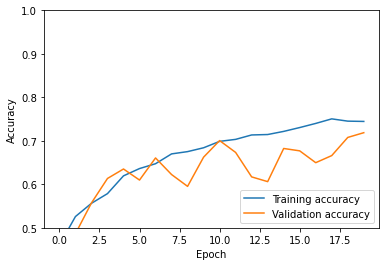

In [33]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

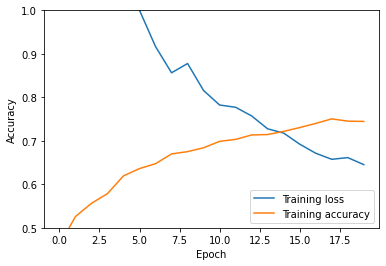

In [34]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')